In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("TRAIN4.csv", index_col = 0)
df.head(2)

,depth,table,x,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,,,,,,,,,,,,,,,,,,,,,
0.30,62.4,58.0,4.31,6.353,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1.01,62.7,56.0,6.42,9.183,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 17.9 µs


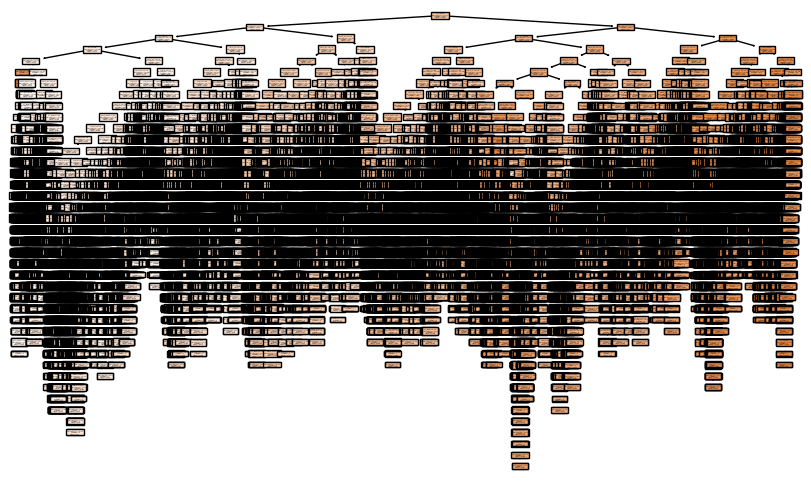

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

4.795831523312719

In [9]:
# max depth

print(regressor.tree_.max_depth)

40


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.105120,0.022199,0.148992,0.978263,test,Decission Tree I
1,0.000801,0.000070,0.008360,0.999933,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 9 µs, sys: 21 µs, total: 30 µs
Wall time: 74.1 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.904, test=-0.923) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.019, test=-1.018) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.001, test=-1.004) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.016, test=-1.028) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.993, test=-0.989) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.468, test=-0.467) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.940, test=-0.955) total time=   0.0s
[CV 8/10] END max_depth=4, max_feature

[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.334, test=-0.346) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.350, test=-0.338) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.985, test=-0.995) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.720, test=-0.723) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.955, test=-0.951) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.273, test=-0.268) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.184, test=-0.187) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=4, min_samples_split=10;, score=(train=-0.983, test=-0.999) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=

[CV 8/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.414, test=-0.408) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.304, test=-0.298) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.268, test=-0.262) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.893, test=-0.904) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.860, test=-0.845) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.591, test=-0.601) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.870, test=-0.905) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.297, test=-0.303) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=6, min_

[CV 10/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.239, test=-0.238) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.798, test=-0.807) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-1.000, test=-1.002) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.973, test=-0.974) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.532, test=-0.546) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.348, test=-0.354) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.910, test=-0.911) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.795, test=-0.796) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=3, min

[CV 9/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.669, test=-0.654) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.130, test=-0.131) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.205, test=-0.199) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.117, test=-0.123) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.921, test=-0.920) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.279, test=-0.293) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.161, test=-0.159) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.960, test=-0.975) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=5, min_

[CV 3/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.613, test=-0.615) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.377, test=-0.392) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.818, test=-0.801) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.783, test=-0.820) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.751, test=-0.785) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.870, test=-0.888) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.946, test=-0.926) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.953, test=-0.958) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=2, min_

[CV 3/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.249, test=-0.252) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.255, test=-0.255) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.099, test=-0.100) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.424, test=-0.436) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.197, test=-0.217) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.583, test=-0.588) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.443, test=-0.449) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.271, test=-0.272) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=4, min_

[CV 4/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.195, test=-0.201) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.787, test=-0.789) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.181, test=-0.186) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.754, test=-0.783) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.105, test=-0.108) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.372, test=-0.350) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.549, test=-0.539) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.869, test=-0.882) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=

[CV 6/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.349, test=-0.342) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.443, test=-0.474) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.787, test=-0.793) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.682, test=-0.666) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.654, test=-0.625) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.515, test=-0.505) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.315, test=-0.312) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.147, test=-0.154) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=3, min_

[CV 8/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.255, test=-0.254) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.093, test=-0.090) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.453, test=-0.459) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.292, test=-0.291) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.149, test=-0.147) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.102, test=-0.106) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.089, test=-0.094) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.120, test=-0.119) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5,

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=5, min_samples_split=100)

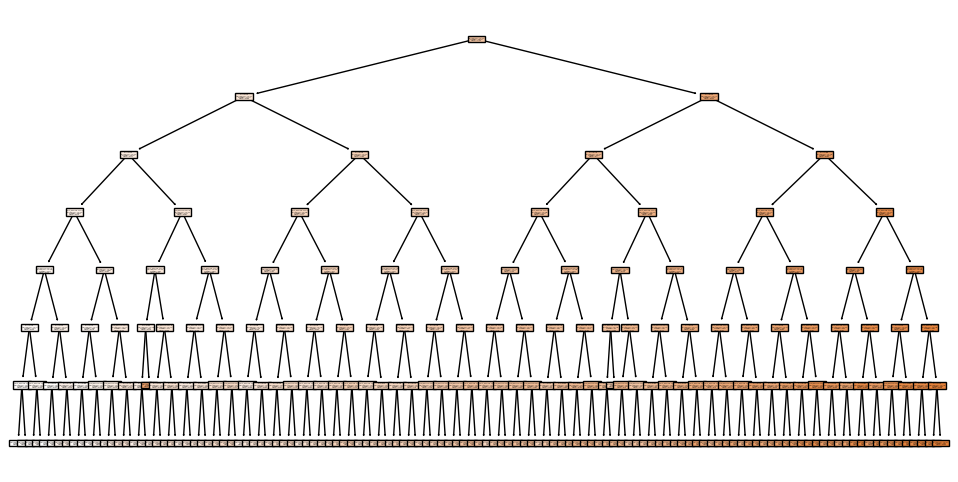

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [ ]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.58
|   |--- y <= 4.92
|   |   |--- x <= 4.62
|   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |--- x <= 4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.12]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.24]
|   |   |   |   |   |--- x >  4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.25]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |--- x <= 4.24
|   |   |   |   |   |   |--- y <= 4.17
|   |   |   |   |   |   |   |--- value: [6.09]
|   |   |   |   |   |   |--- y >  4.17
|   |   |   |   |   |   |   |--- value: [6.27]
|   |   |   |   |   |--- x >  4.24
|   |   |   |   |   |   |--- x <= 4.40
|   |   |   |   |   |   |   |--- value: [6.47]
|   |   |   |   | 

In [18]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [19]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [20]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.339253,0.195093,0.441693,0.808968,test,Decision tree II
1,0.333119,0.190826,0.436836,0.815991,train,Decision tree II


# prueba predicciones 

In [22]:
df = pd.read_csv("realidad4.csv", index_col = 0)
X_realida = df


In [23]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.37166885, 8.55547876, 8.55547876, ..., 6.9264218 , 8.55547876,
       8.55547876])

In [24]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.371669
1,1,8.555479
2,2,8.555479
3,3,7.262273
4,4,8.906469
...,...,...
13480,13480,8.555479
13481,13481,8.555479
13482,13482,6.926422
13483,13483,8.555479


In [25]:
submision1.to_csv("valen4.csv", index=False)